# Import essential libraries

In [1]:
from matplotlib import pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import sparse_categorical_crossentropy

# Load in the fashion MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape  # Says 60,000 observations of images of pixel size 28X28

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# The train_labels above stand for these class names...  [0-9]

In [8]:
test_images.shape    # Says 10,000 images of pixel size 28X28

(10000, 28, 28)

# Data Preprocessing

In [9]:
# Normalize the data [0-1]
# The FASHION-MNIST Datasest contains images of pixel values ranging from 0-255
# To normalize the image pixels, divide the image by the highest pixel value i.e 255

train_images = train_images / 255.0
test_images = test_images / 255.0

# Analyzing the data

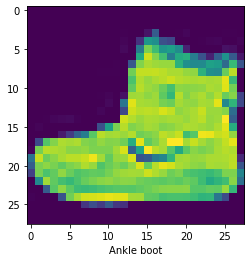

In [10]:
plt.imshow(train_images[0])
plt.xlabel(class_names[train_labels[0]])
plt.show()

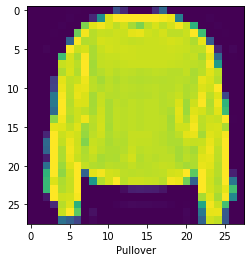

In [11]:
plt.imshow(train_images[7])
plt.xlabel(class_names[train_labels[7]])
plt.show()

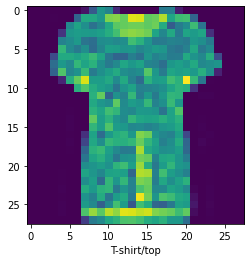

In [12]:
plt.imshow(train_images[1327])
plt.xlabel(class_names[train_labels[1327]])
plt.show()

# Model Architecture
- If you are dealing with an image dataset, then you need to flatten the data before passing to the dense layers of a   Sequential tf.keras model

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


# Compiling the model (model configuration)
   - Optimizer(lr)
   - Loss
   - metrics

In [17]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with the training data

In [18]:
model.fit(train_images, train_labels, validation_split=0.2, batch_size=64, epochs=10)

Epoch 1/10
750/750 [==============================] - 3s 4ms/step - loss: 0.5361 - accuracy: 0.8153 - val_loss: 0.4156 - val_accuracy: 0.8556
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3897 - accuracy: 0.8598 - val_loss: 0.3864 - val_accuracy: 0.8602
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3460 - accuracy: 0.8737 - val_loss: 0.3668 - val_accuracy: 0.8678
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3217 - accuracy: 0.8828 - val_loss: 0.3469 - val_accuracy: 0.8728
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3030 - accuracy: 0.8890 - val_loss: 0.3543 - val_accuracy: 0.8719
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2891 - accuracy: 0.8928 - val_loss: 0.3397 - val_accuracy: 0.8790
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2737 - accuracy: 0.8974 - val_loss: 0.3141 - val_accuracy: 0.8873
Epoch 

###### our model has been trained on the data with 90% accuracy

# Evaluating our model on test data

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3455 - accuracy: 0.8775


# Predictions

In [20]:
predictions = model.predict(test_images)

In [21]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

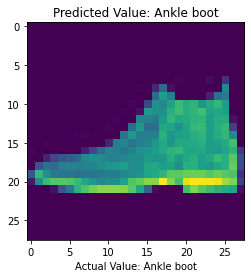

------------------------------------------------------


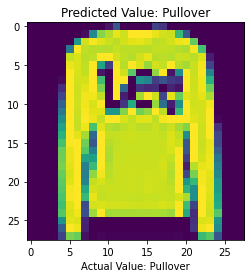

------------------------------------------------------


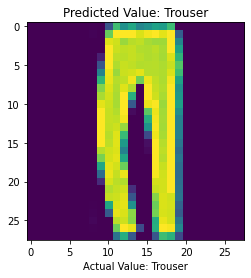

------------------------------------------------------


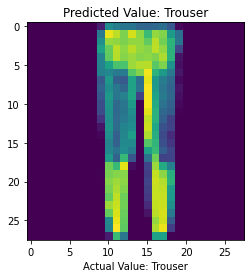

------------------------------------------------------


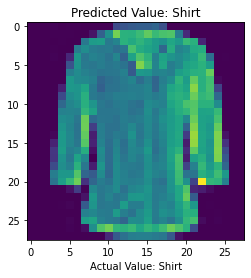

------------------------------------------------------


In [22]:
for i in range(5):
    plt.imshow(test_images[i])
    plt.xlabel(f"Actual Value: {class_names[test_labels[i]]}")
    plt.title(f"Predicted Value: {class_names[np.argmax(predictions[i])]}")
    plt.show()
    print("------------------------------------------------------")